<a href="https://colab.research.google.com/github/shahrajesh2006/datascience/blob/main/pycaret_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pandas as pd
df=pd.read_csv('data1.csv')
df.head()
df.dtypes

ENDPOINT_ID                    object
_time                          object
avg(UPSTREAM_RESPONSETIME)    float64
avg(RESPONSETIME)             float64
avg(XRESPONSETIME)            float64
dtype: object

In [ ]:
df['_time'] = pd.to_datetime(df['_time'])
df.head()
df.dtypes

ENDPOINT_ID                                                   object
_time                         datetime64[ns, pytz.FixedOffset(-240)]
avg(UPSTREAM_RESPONSETIME)                                   float64
avg(RESPONSETIME)                                            float64
avg(XRESPONSETIME)                                           float64
dtype: object

In [ ]:
from pycaret.clustering import *
s = setup(df, normalize = True)

,Description,Value
0,Session id,6639
1,Original data shape,"(1188, 5)"
2,Transformed data shape,"(1188, 309)"
3,Numeric features,3
4,Categorical features,2
5,Rows with missing values,0.7%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(df, normalize = True)

,Description,Value
0,Session id,4422
1,Original data shape,"(1188, 5)"
2,Transformed data shape,"(1188, 309)"
3,Numeric features,3
4,Categorical features,2
5,Rows with missing values,0.7%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
# functional API
# kmeans = create_model('kmeans')

# OOP API
kmeans = s.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0064,8.6717,9.3436,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(n_clusters=4, random_state=1553)


In [ ]:
# functional API
# evaluate_model(kmeans)

# OOP API
s.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

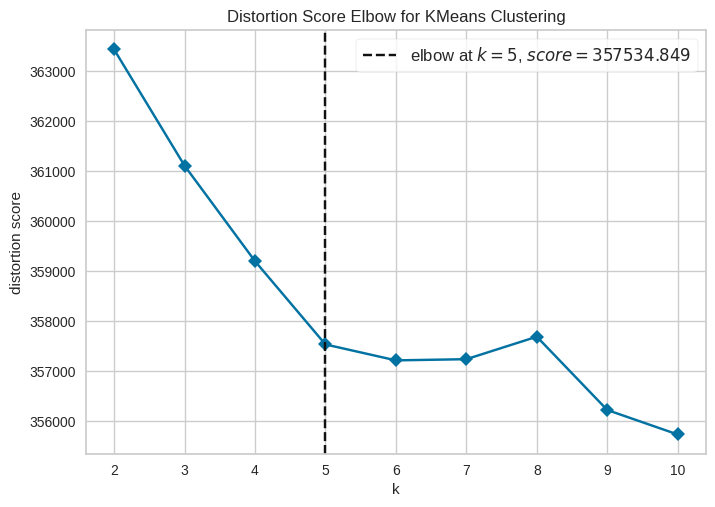

In [ ]:
# functional API
# plot_model(kmeans, plot = 'elbow')

# OOP API
s.plot_model(kmeans, plot = 'elbow')

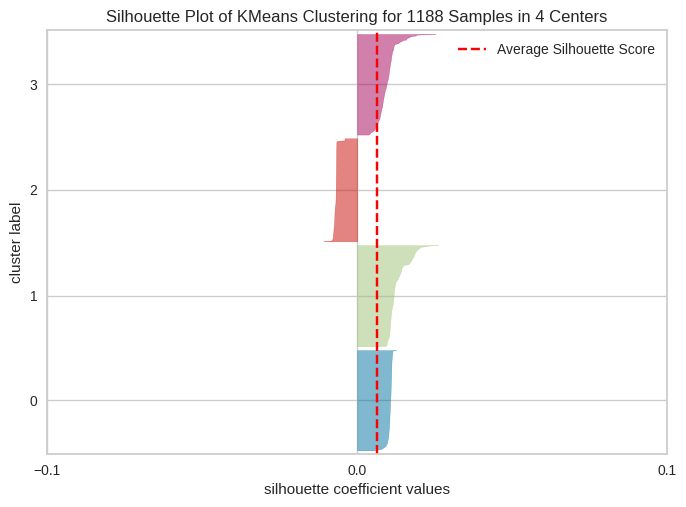

In [ ]:
# functional API
# plot_model(kmeans, plot = 'silhouette')

# OOP API
s.plot_model(kmeans, plot = 'silhouette')

In [ ]:
# functional API
# result = assign_model(kmeans)
# result.head()

# OOP API
result = s.assign_model(kmeans)
result.head()

,ENDPOINT_ID,_time,avg(UPSTREAM_RESPONSETIME),avg(RESPONSETIME),avg(XRESPONSETIME),Cluster
0,14207abba0e340d0a7fbb6d08e4b3d68,2023-05-22T01:40:00.000-04:00,NaN,NaN,NaN,Cluster 2
1,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:00:00.000-04:00,35104.281250,35107.203125,2.920977,Cluster 1
2,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:05:00.000-04:00,35251.523438,35250.882812,-0.641160,Cluster 1
3,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:10:00.000-04:00,33420.628906,33422.441406,1.811753,Cluster 1
4,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:15:00.000-04:00,32651.548828,32654.998047,3.449050,Cluster 1


In [ ]:
df.head()

,ENDPOINT_ID,_time,avg(UPSTREAM_RESPONSETIME),avg(RESPONSETIME),avg(XRESPONSETIME)
0,14207abba0e340d0a7fbb6d08e4b3d68,2023-05-22T01:40:00.000-04:00,NaN,NaN,NaN
1,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:00:00.000-04:00,35104.281032,35107.202009,2.920977
2,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:05:00.000-04:00,35251.522375,35250.881216,-0.641160
3,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:10:00.000-04:00,33420.630019,33422.441771,1.811753
4,2e48fa0972b84e3fb1feaea549e953e1,2023-05-21T11:15:00.000-04:00,32651.549006,32654.998056,3.449050


In [ ]:
# # functional API
# predictions = predict_model(kmeans, data = df)
# predictions.head()

# OOP API
predictions = s.predict_model(kmeans, data = df)
predictions.head()

,ENDPOINT_ID_14207abba0e340d0a7fbb6d08e4b3d68,ENDPOINT_ID_2e48fa0972b84e3fb1feaea549e953e1,ENDPOINT_ID_445ce717ee7d4e1093e0c5de7f68ba15,ENDPOINT_ID_73c95187289747849f4ad54e8d0f0c32,ENDPOINT_ID_8130a4c7ca184191b1af9d248c64b08b,ENDPOINT_ID_a130f581f76a4e2587bf7aca92234683,ENDPOINT_ID_bac14af4097f43b2b90274bd652c1391,ENDPOINT_ID_e6ebdd341e374e03a0d0f66695d160d9,ENDPOINT_ID_ebcac394048e45269469d1fa09c3ce3b,ENDPOINT_ID_f0a85b6175954fdfbc44bea70f1c9430,...,_time_2023-05-22T11:05:00.000-04:00,_time_2023-05-22T11:10:00.000-04:00,_time_2023-05-22T11:15:00.000-04:00,_time_2023-05-22T11:20:00.000-04:00,_time_2023-05-22T11:25:00.000-04:00,_time_2023-05-22T11:30:00.000-04:00,avg(UPSTREAM_RESPONSETIME),avg(RESPONSETIME),avg(XRESPONSETIME),Cluster
0,34.452866,-0.576054,-0.029025,-0.574758,-0.029025,-0.574758,-0.574758,-0.029025,-0.029025,-0.029025,...,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,3.878538e-08,-3.154547e-08,2.295015e-08,Cluster 2
1,-0.029025,1.735947,-0.029025,-0.574758,-0.029025,-0.574758,-0.574758,-0.029025,-0.029025,-0.029025,...,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,1.289913e+00,1.289037e+00,-8.742320e-01,Cluster 1
2,-0.029025,1.735947,-0.029025,-0.574758,-0.029025,-0.574758,-0.574758,-0.029025,-0.029025,-0.029025,...,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,1.301495e+00,1.300359e+00,-9.509849e-01,Cluster 1
3,-0.029025,1.735947,-0.029025,-0.574758,-0.029025,-0.574758,-0.574758,-0.029025,-0.029025,-0.029025,...,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,1.157471e+00,1.156269e+00,-8.981323e-01,Cluster 1
4,-0.029025,1.735947,-0.029025,-0.574758,-0.029025,-0.574758,-0.574758,-0.029025,-0.029025,-0.029025,...,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,-0.058124,1.096972e+00,1.095790e+00,-8.628537e-01,Cluster 1
